# UNINA - Machine Learning 22/23 - MiniContest n2
---

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_style('whitegrid')

### raw data

In [2]:
with warnings.catch_warnings(record=True):
    df_raw = pd.read_excel("Training_raw.xlsx", engine="openpyxl")

In [3]:
df_raw.head()

,second,val_0,val_1,val_2,val_3,val_4,val_5
0,0,41,49,95,120,47,46
1,0,41,49,95,120,47,46
2,0,41,49,95,121,48,47
3,0,41,49,95,121,47,47
4,0,41,49,95,121,47,47


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567296 entries, 0 to 567295
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   second  567296 non-null  int64
 1   val_0   567296 non-null  int64
 2   val_1   567296 non-null  int64
 3   val_2   567296 non-null  int64
 4   val_3   567296 non-null  int64
 5   val_4   567296 non-null  int64
 6   val_5   567296 non-null  int64
dtypes: int64(7)
memory usage: 30.3 MB


In [5]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
second,567296.0,499.501680,290.536868,0.0,250.0,502.0,748.0,1001.0
val_0,567296.0,52.516512,32.244423,4.0,19.0,51.0,87.0,424.0
val_1,567296.0,50.416340,31.412104,5.0,20.0,44.0,82.0,214.0
val_2,567296.0,61.374905,38.249684,4.0,20.0,71.0,99.0,206.0
val_3,567296.0,101.994865,81.212673,4.0,15.0,110.0,184.0,351.0
val_4,567296.0,90.534931,80.356453,4.0,18.0,44.0,194.0,333.0
val_5,567296.0,105.675677,72.540199,4.0,25.0,128.0,179.0,392.0


In [6]:
(df_raw.isnull().sum() > 0 ).any()

False

### preprocessed data

In [7]:
with warnings.catch_warnings(record=True):
    df_prep = pd.read_excel("Training_preprocessed.xlsx", engine="openpyxl")

In [8]:
df_prep.head()

,second,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,...,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var,class
0,0,41,49,95,120,47,46,41,50,96,...,0.470824,0.384426,0.435494,0.000000,0.147783,0.123153,0.221675,0.147783,0.189655,0.00
1,1,18,19,18,10,14,17,46,76,103,...,38.948626,7.553299,3.295951,5.233212,34.764129,697.845107,1516.995484,57.052327,10.863294,0.10
2,2,23,32,15,11,16,31,48,65,98,...,40.252709,4.550546,1.860322,3.213855,18.106360,691.942503,1620.280581,20.707469,3.460800,0.29
3,3,26,25,19,15,16,32,48,70,102,...,39.295043,5.509494,2.184437,2.449684,27.190514,650.722495,1544.100420,30.354529,4.771767,0.48
4,4,23,30,20,12,19,33,46,69,108,...,40.876464,5.202366,1.715481,2.499633,23.186358,732.476140,1670.885299,27.064610,2.942875,0.68


In [9]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   second      1002 non-null   int64  
 1   val_0_min   1002 non-null   int64  
 2   val_1_min   1002 non-null   int64  
 3   val_2_min   1002 non-null   int64  
 4   val_3_min   1002 non-null   int64  
 5   val_4_min   1002 non-null   int64  
 6   val_5_min   1002 non-null   int64  
 7   val_0_max   1002 non-null   int64  
 8   val_1_max   1002 non-null   int64  
 9   val_2_max   1002 non-null   int64  
 10  val_3_max   1002 non-null   int64  
 11  val_4_max   1002 non-null   int64  
 12  val_5_max   1002 non-null   int64  
 13  val_0_mean  1002 non-null   float64
 14  val_1_mean  1002 non-null   float64
 15  val_2_mean  1002 non-null   float64
 16  val_3_mean  1002 non-null   float64
 17  val_4_mean  1002 non-null   float64
 18  val_5_mean  1002 non-null   float64
 19  val_0_med   1002 non-null  

In [10]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
second,1002.0,500.500000,289.396786,0.000000,250.250000,500.500000,750.750000,1001.000000
val_0_min,1002.0,23.893214,31.051431,4.000000,7.000000,9.000000,13.000000,91.000000
val_1_min,1002.0,25.308383,31.098498,5.000000,8.000000,10.000000,18.000000,96.000000
val_2_min,1002.0,27.657685,34.722154,4.000000,7.000000,10.000000,21.000000,101.000000
val_3_min,1002.0,42.637725,69.885031,4.000000,6.000000,8.000000,14.000000,195.000000
val_4_min,1002.0,44.834331,73.276715,4.000000,7.000000,10.000000,16.000000,209.000000
val_5_min,1002.0,42.239521,67.263676,4.000000,7.000000,9.000000,16.000000,188.000000
val_0_max,1002.0,93.000998,29.219330,19.000000,84.250000,92.000000,105.000000,424.000000
val_1_max,1002.0,94.774451,23.776999,21.000000,82.000000,94.000000,107.000000,214.000000
val_2_max,1002.0,106.046906,26.967713,27.000000,98.000000,105.000000,122.000000,206.000000


In [11]:
(df_prep.isnull().sum() > 0 ).any()

False

In [12]:
df_prep_drop = df_prep.drop(['second', 'class'], axis=1)
df_prep_drop.head()

,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,val_3_max,...,val_2_std,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var
0,41,49,95,120,47,46,41,50,96,121,...,0.350931,0.470824,0.384426,0.435494,0.000000,0.147783,0.123153,0.221675,0.147783,0.189655
1,18,19,18,10,14,17,46,76,103,124,...,26.416758,38.948626,7.553299,3.295951,5.233212,34.764129,697.845107,1516.995484,57.052327,10.863294
2,23,32,15,11,16,31,48,65,98,125,...,26.304800,40.252709,4.550546,1.860322,3.213855,18.106360,691.942503,1620.280581,20.707469,3.460800
3,26,25,19,15,16,32,48,70,102,127,...,25.509263,39.295043,5.509494,2.184437,2.449684,27.190514,650.722495,1544.100420,30.354529,4.771767
4,23,30,20,12,19,33,46,69,108,127,...,27.064296,40.876464,5.202366,1.715481,2.499633,23.186358,732.476140,1670.885299,27.064610,2.942875


<AxesSubplot: >

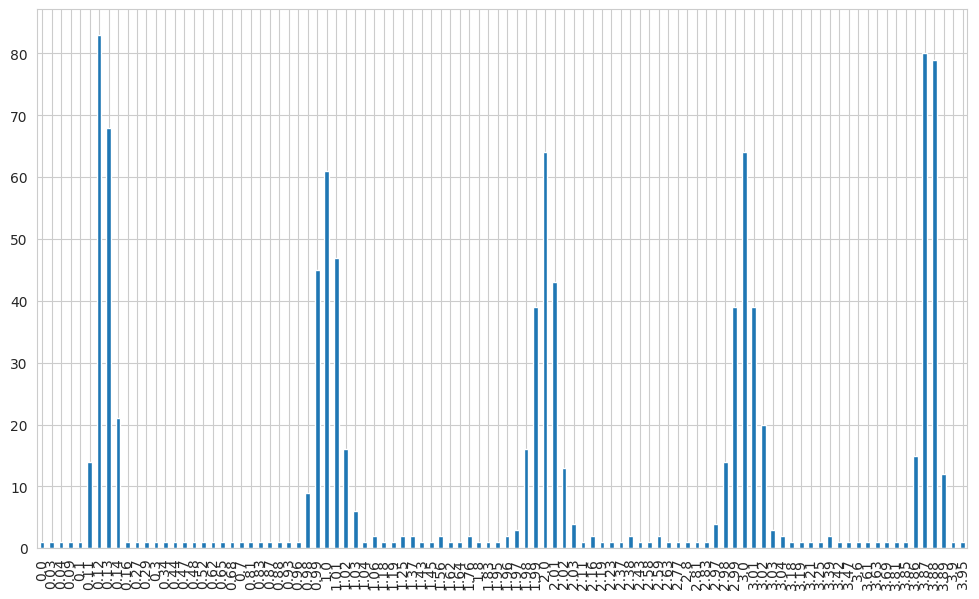

In [13]:
classes = pd.value_counts(df_prep["class"], sort=True).sort_index()
classes.plot(kind="bar", figsize=(12,7))

<AxesSubplot: >

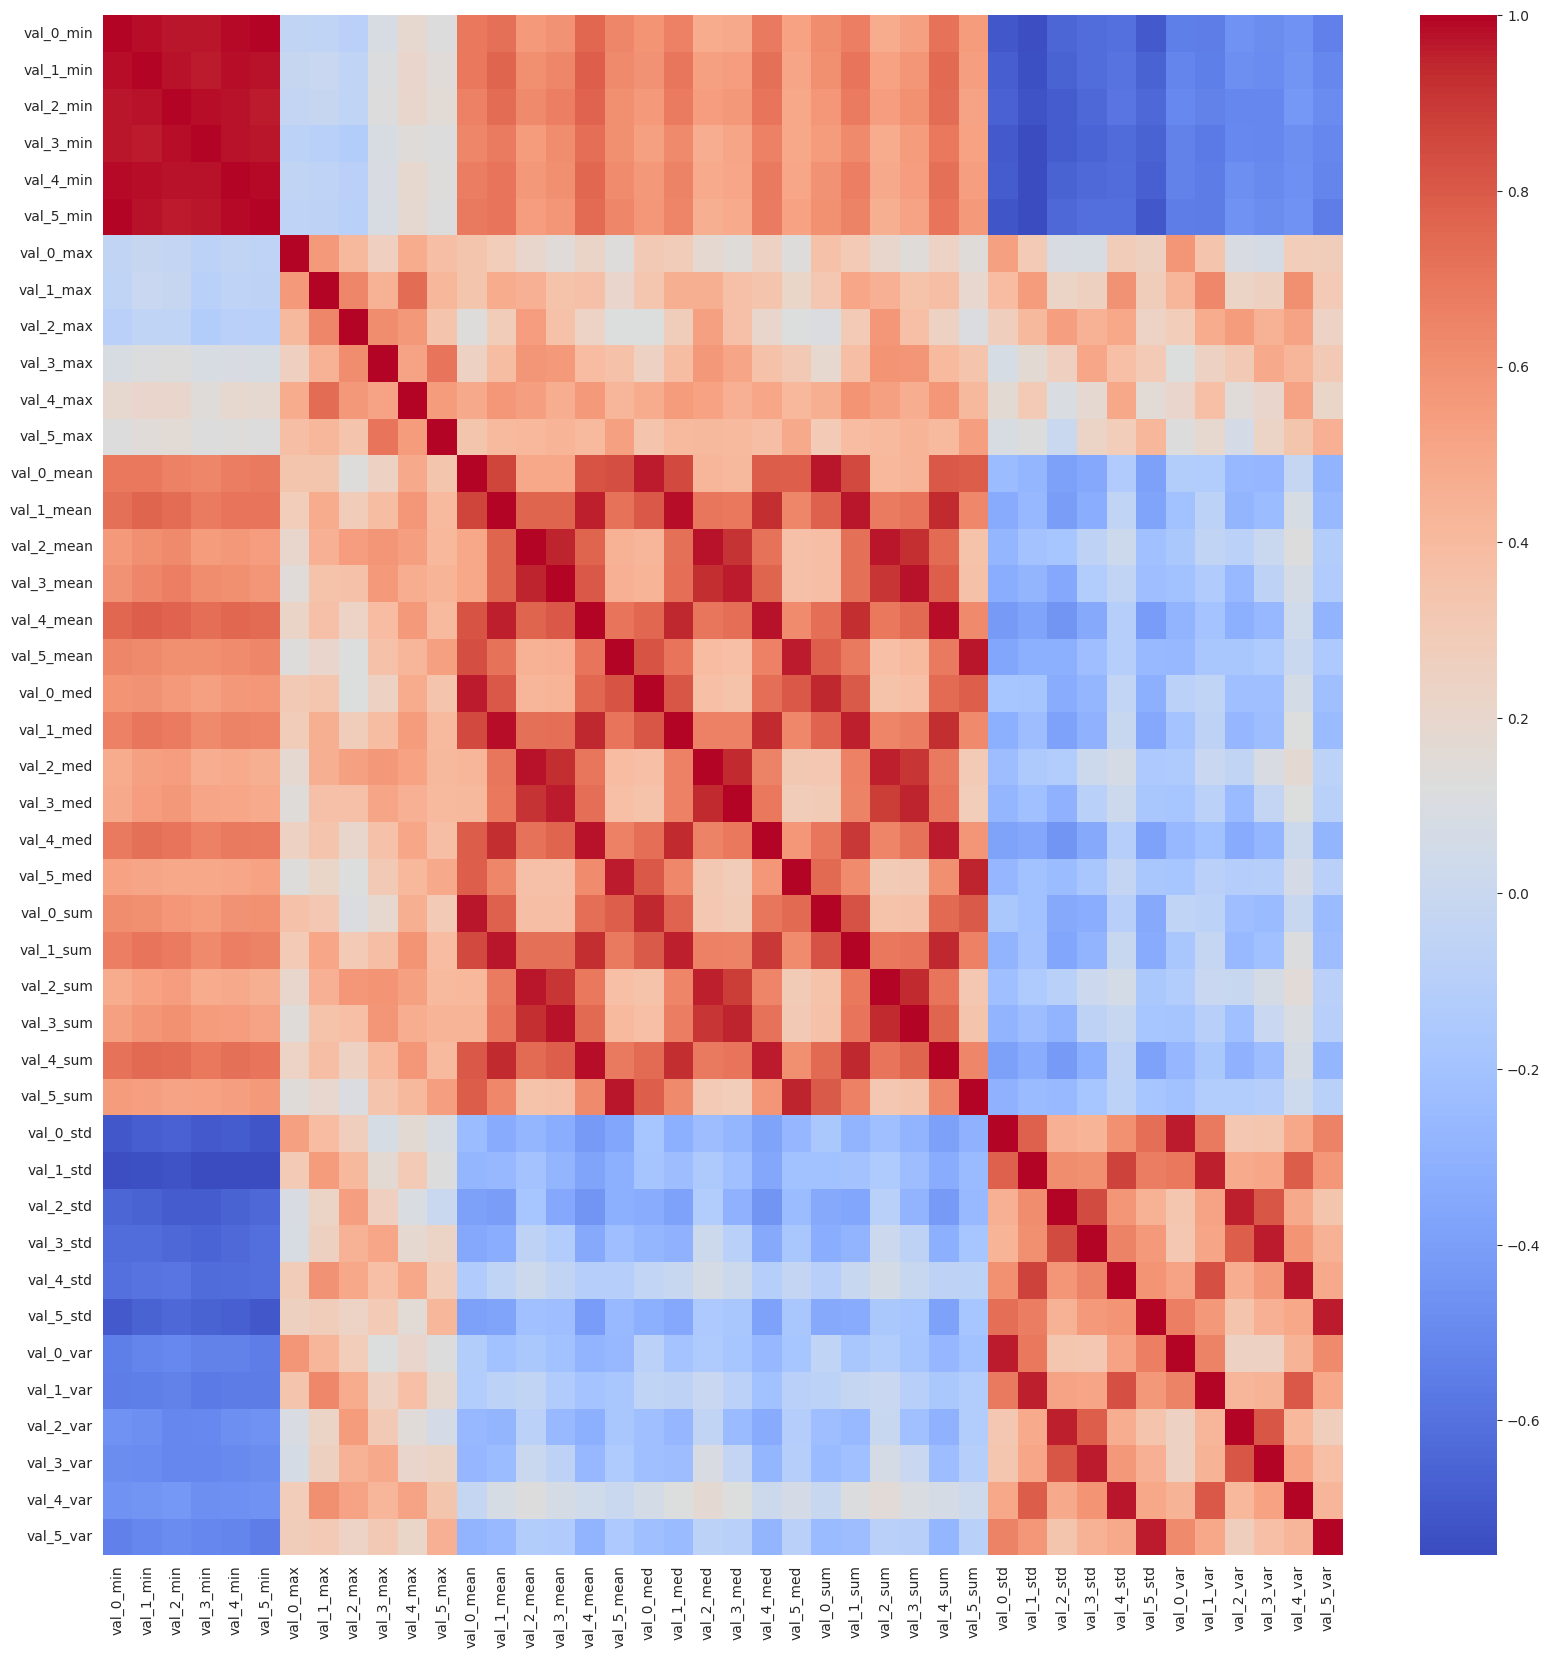

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df_prep_drop.corr(), cmap='coolwarm')

## Scaling data

In [15]:
from sklearn.preprocessing import RobustScaler

In [16]:
scaler = RobustScaler()

In [17]:
scaler.fit(df_prep_drop)

RobustScaler()

In [18]:
scaled_features = scaler.fit_transform(df_prep_drop)

In [19]:
X = pd.DataFrame(scaled_features, columns=df_prep_drop.columns)
X.head()

,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,val_3_max,...,val_2_std,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var
0,5.333333,3.9,6.071429,14.000,4.111111,4.111111,-2.457831,-1.76,-0.375000,-2.88,...,-0.840814,-0.707368,-0.665100,-0.801715,-0.456197,-0.594712,-0.444281,-0.430601,-0.346741,-0.473730
1,1.500000,0.9,0.571429,0.250,0.444444,0.888889,-2.216867,-0.72,-0.083333,-2.76,...,0.459148,-0.022648,-0.527824,-0.743267,-0.448266,-0.513511,0.602714,-0.026823,-0.330740,-0.470517
2,2.333333,2.2,0.357143,0.375,0.666667,2.444444,-2.120482,-1.16,-0.291667,-2.72,...,0.453565,0.000559,-0.585323,-0.772601,-0.451326,-0.552586,0.593856,0.000672,-0.340960,-0.472745
3,2.833333,1.5,0.642857,0.875,0.666667,2.555556,-2.120482,-0.96,-0.125000,-2.64,...,0.413889,-0.016483,-0.566961,-0.765979,-0.452484,-0.531277,0.532002,-0.019607,-0.338247,-0.472350
4,2.333333,2.0,0.714286,0.500,1.000000,2.666667,-2.216867,-1.00,0.125000,-2.64,...,0.491442,0.011659,-0.572842,-0.775561,-0.452408,-0.540669,0.654681,0.014144,-0.339172,-0.472901


## Train test split and feature selection

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

In [21]:
data = df_prep_drop
X = X
y = df_prep["class"]

In [22]:
abr = AdaBoostRegressor(random_state=100, n_estimators=50).fit(X, y)

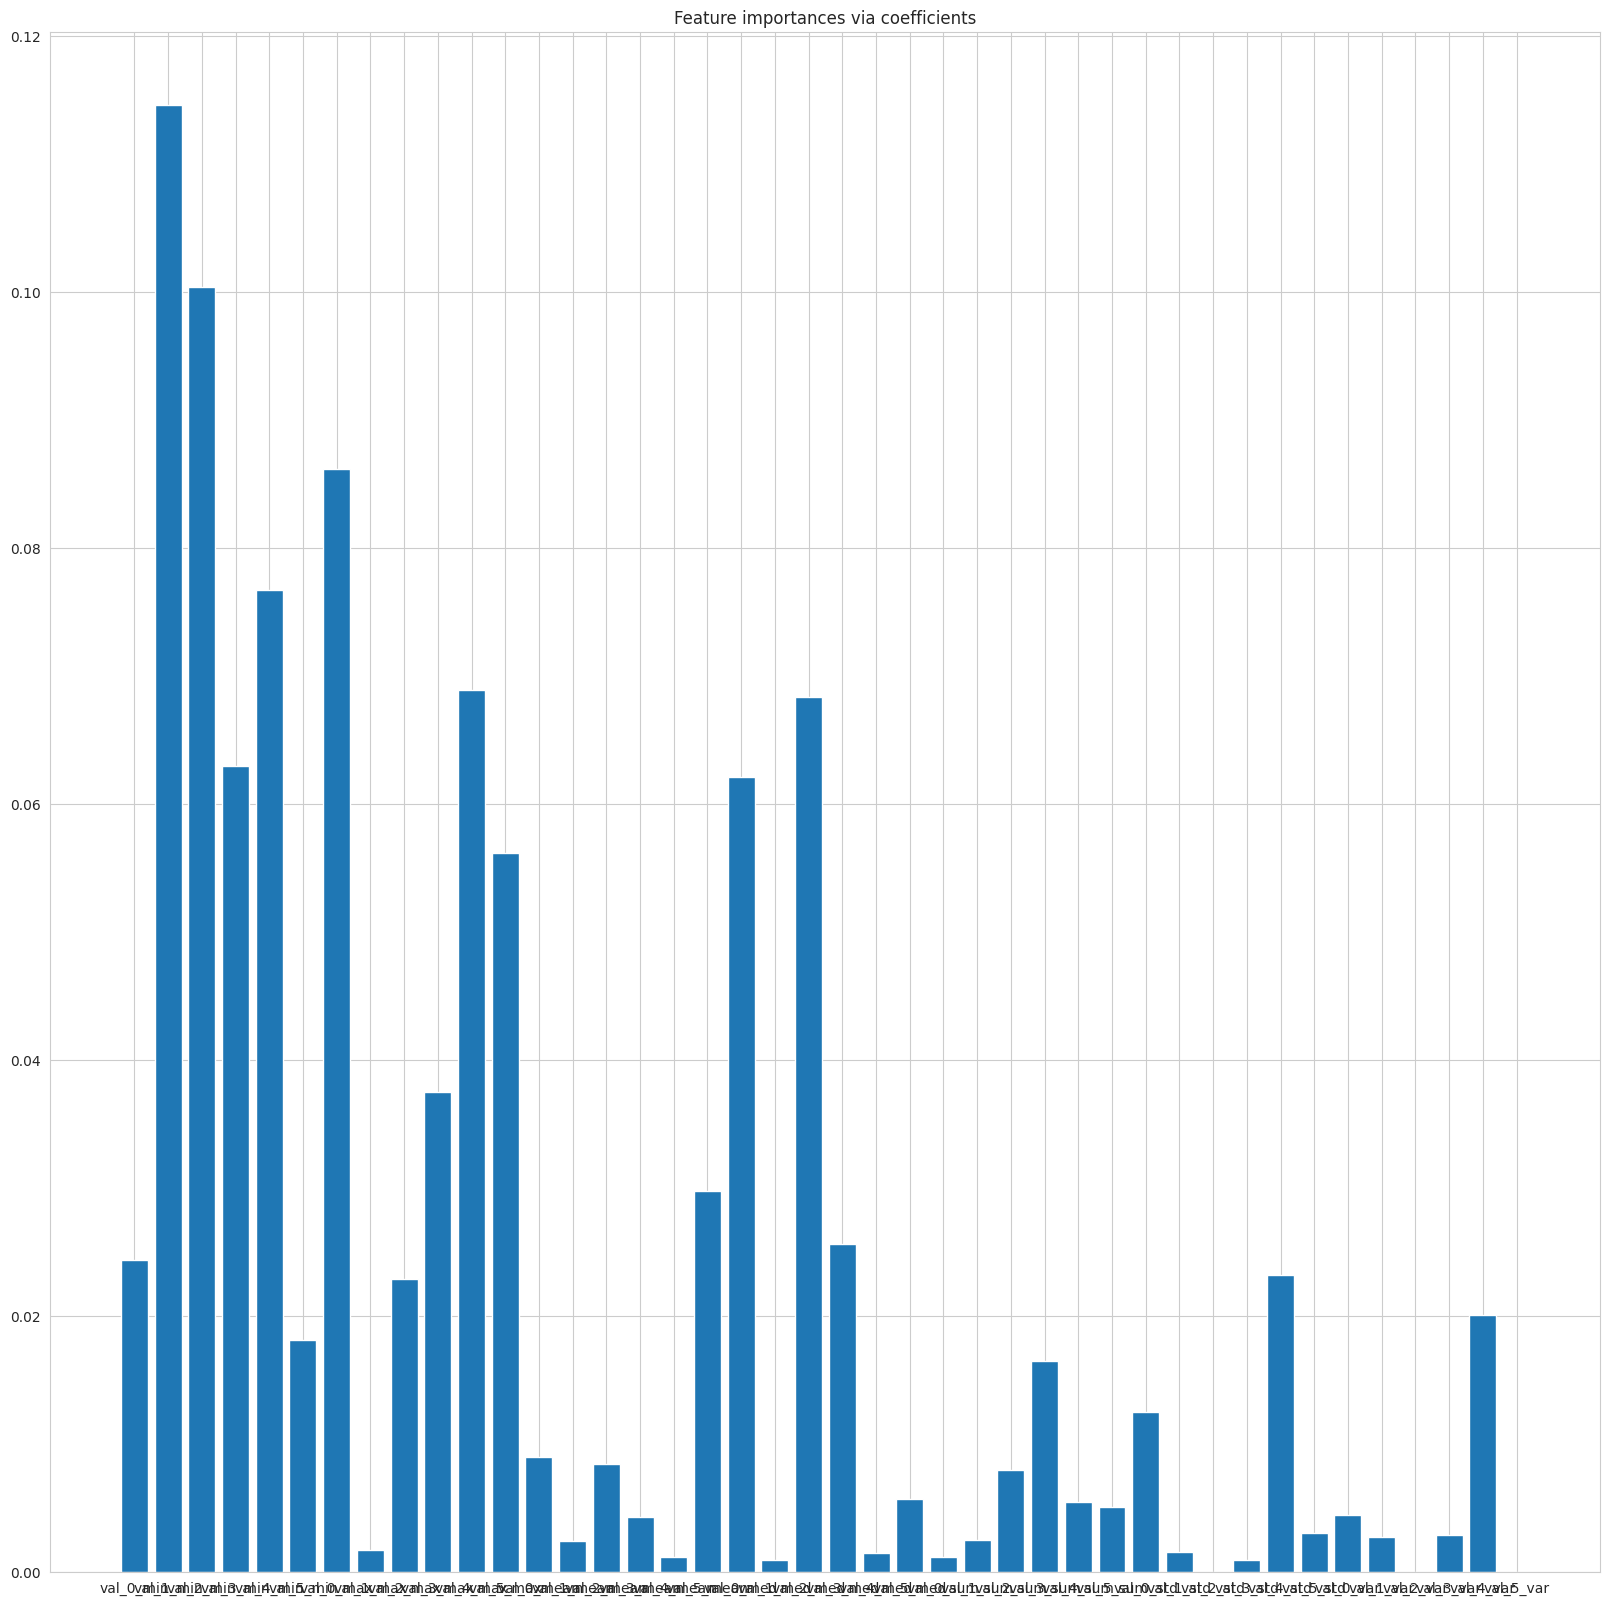

In [23]:
importance = np.abs(abr.feature_importances_)
feature_names = data.columns
plt.figure(figsize=(20, 20))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [24]:
threshold = 0.02

In [25]:
len(importance[importance >= threshold])

16

In [26]:
selector = SelectFromModel(estimator=abr, threshold=threshold, prefit=True)

In [27]:
X_new = pd.DataFrame(data=selector.transform(X), columns=feature_names[selector.get_support()])
X_new.head()

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_0_max,val_2_max,val_3_max,val_4_max,val_5_max,val_5_mean,val_0_med,val_2_med,val_3_med,val_4_std,val_4_var
0,5.333333,3.9,6.071429,14.000,4.111111,-2.457831,-0.375000,-2.88,-4.111111,-4.730435,-0.584114,-0.273438,0.113924,-0.166667,-0.665100,-0.346741
1,1.500000,0.9,0.571429,0.250,0.444444,-2.216867,-0.083333,-2.76,-3.888889,-4.626087,-0.590734,-0.273438,0.063291,-0.190476,-0.527824,-0.330740
2,2.333333,2.2,0.357143,0.375,0.666667,-2.120482,-0.291667,-2.72,-3.472222,-4.660870,-0.585835,-0.273438,0.050633,-0.220238,-0.585323,-0.340960
3,2.833333,1.5,0.642857,0.875,0.666667,-2.120482,-0.125000,-2.64,-3.638889,-4.660870,-0.588288,-0.273438,0.037975,-0.220238,-0.566961,-0.338247
4,2.333333,2.0,0.714286,0.500,1.000000,-2.216867,0.125000,-2.64,-3.777778,-4.626087,-0.586711,-0.273438,-0.056962,-0.279762,-0.572842,-0.339172


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=100, shuffle=True)

In [29]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (751, 16)
X_test shape: (251, 16)
y_train shape: (751,)
y_test shape: (251,)


In [30]:
models = []

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
pred = lm.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
mae_lm = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_lm}")

MAE: 0.46753524936290886


In [37]:
models.append((mae_lm, lm))

## PLS Regression

In [38]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [39]:
pls = PLSRegression()

In [40]:
parameters = {
    'n_components' : [i for i in range(1, 16)],
}

In [41]:
grid_search = GridSearchCV(estimator=pls,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=10,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=PLSRegression(), n_jobs=-1,
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring='neg_mean_absolute_error')

In [43]:
print(grid_search.best_params_)
pls_best = grid_search.best_estimator_

{'n_components': 5}


In [44]:
pred = pls_best.predict(X_test)

In [45]:
mae_pls = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_pls}")

MAE: 0.45382139412992073


In [46]:
models.append((mae_pls, pls_best))

## Ridge Regression

In [47]:
from sklearn.linear_model import Ridge

In [48]:
ridge = Ridge(max_iter=5000)

In [49]:
parameters = {
    'alpha' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100),
    'solver': ('svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
}

In [50]:
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=10,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=Ridge(max_iter=5000),
             n_jobs=-1,
             param_grid={'alpha': (1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100),
                         'solver': ('svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga')},
             scoring='neg_mean_absolute_error')

In [52]:
print(grid_search.best_params_)
ridge_best = grid_search.best_estimator_

{'alpha': 0.001, 'solver': 'sparse_cg'}


In [53]:
pred = ridge_best.predict(X_test)

In [54]:
mae_ridge = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_ridge}")

MAE: 0.4665196149049646


In [55]:
models.append((mae_ridge, ridge_best))

## Lasso Regression

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lasso = Lasso(max_iter=5000)

In [58]:
parameters = {
    'alpha' : (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100),
    'selection': ('cyclic', 'random'),
}

In [59]:
grid_search = GridSearchCV(estimator=lasso,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=10,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=Lasso(max_iter=5000),
             n_jobs=-1,
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 50, 100),
                         'selection': ('cyclic', 'random')},
             scoring='neg_mean_absolute_error')

In [61]:
print(grid_search.best_params_)
lasso_best = grid_search.best_estimator_

{'alpha': 0.01, 'selection': 'random'}


In [62]:
pred = lasso_best.predict(X_test)

In [63]:
mae_lasso = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_lasso}")

MAE: 0.45798740932340093


In [64]:
models.append((mae_lasso, lasso_best))

## Gradient Boosting Regression

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
gbr_best = GradientBoostingRegressor(alpha=0.001, max_depth=1250, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=750)

Best parameters after doing GridSearchCV.

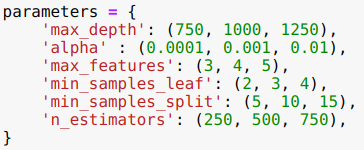

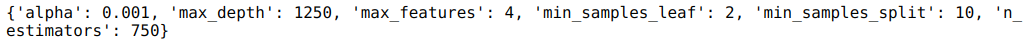

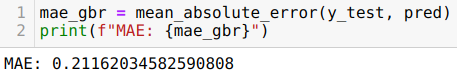

GridSeachCV is not needed anymore because we found the best parameters.

In [67]:
# grid_search = GridSearchCV(estimator=gbr,
#                            param_grid=parameters,
#                            n_jobs=-1,
#                            cv=10,
#                            scoring='neg_mean_absolute_error',
#                            error_score='raise')

In [68]:
gbr_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.001, max_depth=1250, max_features=4,
                          min_samples_leaf=2, min_samples_split=10,
                          n_estimators=750)

In [69]:
pred = gbr_best.predict(X_test)

In [70]:
mae_gbr = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_gbr}")

MAE: 0.19867258362581205


In [71]:
models.append((mae_gbr, gbr_best))

## Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dtree_best = DecisionTreeRegressor(criterion='friedman_mse', max_depth=2000, max_features=6, min_samples_leaf=1, min_samples_split=3, splitter='best')

Best parameters after doing GridSearchCV.

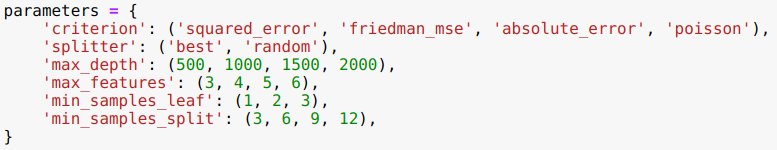

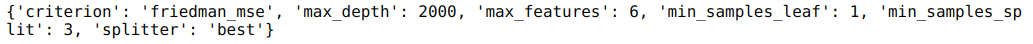

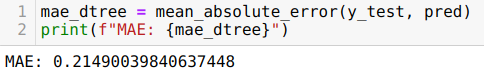

GridSeachCV is not needed anymore because we found the best parameters.

In [74]:
# grid_search = GridSearchCV(estimator=dtree,
#                            param_grid=parameters,
#                            n_jobs=-1,
#                            cv=10,
#                            scoring='neg_mean_absolute_error',
#                            error_score='raise')

In [75]:
dtree_best.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2000, max_features=6,
                      min_samples_split=3)

In [76]:
pred = dtree_best.predict(X_test)

In [77]:
mae_dtree = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_dtree}")

MAE: 0.22262948207171315


In [78]:
models.append((mae_dtree, dtree_best))

## k-Nearest Neighbors Regressor

In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
error_rate = []
for i in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X, y)
    pred_i = knn.predict(X)
    error_rate.append(np.mean(pred_i != y))

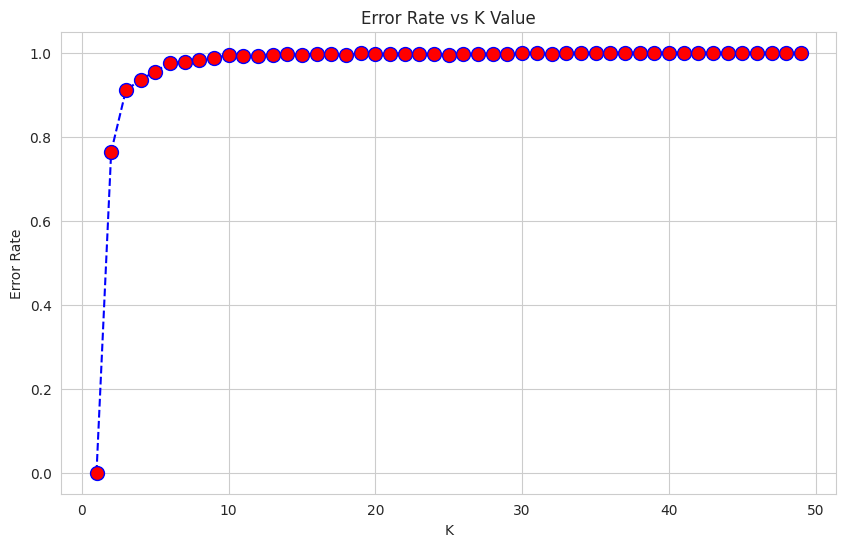

In [81]:
plt.figure(figsize=(10,6))
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [82]:
min_value_index = error_rate.index(min(filter(lambda x: x>0, error_rate)))

In [83]:
knn_best = KNeighborsRegressor(n_neighbors=min_value_index, algorithm='auto', leaf_size=1, metric='minkowski', p=1, weights='distance')

Best parameters after doing GridSearchCV.

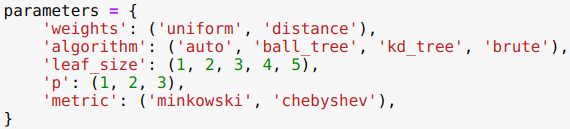

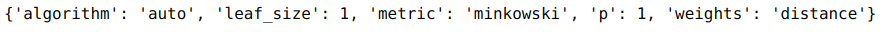

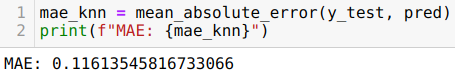

GridSeachCV is not needed anymore because we found the best parameters.

In [84]:
# grid_search = GridSearchCV(estimator=knn,
#                            param_grid=parameters,
#                            n_jobs=-1,
#                            cv=10,
#                            scoring='neg_mean_absolute_error',
#                            error_score='raise')

In [85]:
knn_best.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=1, n_neighbors=1, p=1, weights='distance')

In [86]:
pred = knn_best.predict(X_test)

In [87]:
mae_knn = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_knn}")

MAE: 0.11613545816733066


In [88]:
models.append((mae_knn, knn_best))

## SVM

In [89]:
from sklearn.svm import SVR

In [90]:
svr_best = SVR(kernel='rbf', gamma=0.1, C=7)

In [91]:
svr_best.fit(X_train, y_train)

SVR(C=7, gamma=0.1)

In [92]:
pred = svr_best.predict(X_test)

In [93]:
mae_svr = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_svr}")

MAE: 0.2482951918968942


In [94]:
models.append((mae_svr, svr_best))

## Multi-layer Perceptron Regressor

In [95]:
from sklearn.neural_network import MLPRegressor

In [96]:
mlp_best = MLPRegressor(max_iter=10000, activation='relu', solver='lbfgs', alpha=1, hidden_layer_sizes=(100,100))

In [97]:
mlp_best.fit(X_train, y_train)

MLPRegressor(alpha=1, hidden_layer_sizes=(100, 100), max_iter=10000,
             solver='lbfgs')

In [98]:
pred = mlp_best.predict(X_test)

In [99]:
mae_mlp = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_mlp}")

MAE: 0.21463801527925638


In [100]:
models.append((mae_mlp, mlp_best))

## Evaluating choosen model on a test data

In [101]:
with warnings.catch_warnings(record=True):
    test_df_prep = pd.read_excel("Test_preprocessed.xlsx", engine="openpyxl")

In [102]:
(test_df_prep.isnull().sum() > 0).any()

False

In [103]:
sec = test_df_prep['second']
test_df_prep_no_sec = test_df_prep.drop('second', axis=1)

In [104]:
scaler.fit(test_df_prep_no_sec)

RobustScaler()

In [105]:
scaled_test_features = scaler.fit_transform(test_df_prep_no_sec)

In [106]:
scaled_test_set = pd.DataFrame(scaled_test_features, columns=test_df_prep_no_sec.columns)

In [107]:
scaled_test_set = pd.DataFrame(data=selector.transform(scaled_test_set), columns=scaled_test_set.columns[selector.get_support()])
scaled_test_set.head()

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_0_max,val_2_max,val_3_max,val_4_max,val_5_max,val_5_mean,val_0_med,val_2_med,val_3_med,val_4_std,val_4_var
0,1.75,1.8,1.333333,2.00,1.411765,-0.852273,-0.042781,-0.972222,-0.546169,-4.400000,-0.411159,0.295302,0.662338,0.738693,-0.321195,-0.176549
1,-0.25,0.0,0.666667,1.00,0.000000,-0.897727,-0.106952,-1.111111,-0.522593,-4.200000,-0.527569,-0.322148,0.623377,0.691792,-0.225626,-0.136877
2,-0.25,-0.2,-0.166667,0.00,-0.235294,-0.920455,-0.235294,-1.277778,-0.616896,-4.142857,-0.423444,0.026846,-0.285714,-0.118928,-0.398915,-0.200782
3,-0.25,-0.4,-0.333333,-0.25,-0.470588,-0.920455,-0.299465,-1.472222,-0.656189,-4.114286,-0.542618,-0.375839,-0.337662,-0.139028,-0.464926,-0.215707
4,-0.25,0.0,0.500000,0.50,0.000000,-0.965909,-0.106952,-1.111111,-0.538310,-4.400000,-0.534164,-0.322148,0.623377,0.678392,-0.222059,-0.135185


### Selecting the best model

In [108]:
from operator import itemgetter

In [109]:
best_model = min(models, key=itemgetter(0))[1]

In [110]:
best_model

KNeighborsRegressor(leaf_size=1, n_neighbors=1, p=1, weights='distance')

In [111]:
test_pred = best_model.predict(scaled_test_set)

In [112]:
final_pred = pd.DataFrame(data={'second': sec,
                                'RQ': pd.Series(test_pred)})
final_pred.to_csv("mini_contest_2_results.csv", index=False)